# **Deep Learning Assignment 2**

## **Part one:** Bible verse search engine - use your favorite inspiriational quotes to find the best suiting bible verse!

## **Part two:** Gradient Descent Exercise and Attention Mechanism Exercise

##### *Made by Mikkel and Annika*

# **Introduction**

This exercise is designed to deepen your understanding and skills in modern deep learning techniques. We have two main tasks for you. The first is focused on using SBERT for semantic search, and the second involves hands-on exercises with gradient descent and the attention mechanism.



#Data

You may utilize datasets from 🤗 Hugging Face, Kaggle, or create your own.
For inspiration, refer to the GIF search engine ( https://www.pinecone.io/learn/gif-search/ ) and YouTube search projects ( https://www.pinecone.io/learn/youtube-search/ ).

#Delivery

* Create a dedicated GitHub repository for this assignment.

* Store all relevant materials, including the Colab notebook, in the repository.

* Provide a README.md file with a concise description of the assignment and its components.

* You may work individually or in groups of up to three members.

* Submit your work by emailing a link to the repository to Hamid (hamidb@business.aau.dk).

In [1]:
!pip install sentence-transformers
!pip install transformers matplotlib


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # to add progress bars
from sentence_transformers import SentenceTransformer


# **Part 1: SBERT and Semantic Search**

##Task Description:

Create something innovative using SBERT and semantic search, or even more! The guidelines are intentionally broad to encourage creativity. Here are some ideas to get you started:

* Implement a GIF search engine or YouTube search function using images and CLIP.
* (Optional) Use SetFit for supervised tasks with SBERT models.
* Consider building a search engine using a Gradio or Streamlit app.

## Loading dataset

In [3]:
# Loading the data from github repository
df = pd.read_csv('https://github.com/MikkelONielsen/deeplearning_assignment_2/raw/main/t_bbe.csv')

In [4]:
df.head()

,id,b,c,v,t
0,1001001,1,1,1,At the first God made the heaven and the earth.
1,1001002,1,1,2,And the earth was waste and without form; and ...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God, looking on the light, saw that it was..."
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An..."


We see that theres columns describing the ID, the book, the chapter and verse number, and finally the t-column containing the verse as a string

## Loading data

In [5]:
# defining the simple sentence transformer model

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## EDA

In [6]:
df.shape

(31103, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31103 non-null  int64 
 1   b       31103 non-null  int64 
 2   c       31103 non-null  int64 
 3   v       31103 non-null  int64 
 4   t       31103 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [8]:
# Adding a variable showing if the book is from the Old or New testament
df['t'] = df['t'].astype('str')
df.loc[df['b'] <= 39, 'Testament'] = 'Old'
df.loc[df['b'] > 39, 'Testament'] = 'New'
df

,id,b,c,v,t,Testament
0,1001001,1,1,1,At the first God made the heaven and the earth.,Old
1,1001002,1,1,2,And the earth was waste and without form; and ...,Old
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Old
3,1001004,1,1,4,"And God, looking on the light, saw that it was...",Old
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An...",Old
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...",New
31099,66022018,66,22,18,For I say to every man to whose ears have come...,New
31100,66022019,66,22,19,And if any man takes away from the words of th...,New
31101,66022020,66,22,20,"He who gives witness to these things says, Tru...",New


In [9]:
df.nunique()

id           31103
b               66
c              150
v              176
t            30704
Testament        2
dtype: int64

In [10]:
df_book_1 = df[df['b']==1]

In [11]:
df_old = df[df['Testament'] == 'Old']
df_new = df[df['Testament'] == 'New']

In [12]:
df_old.shape

(23145, 6)

In [13]:
df_new.shape

(7958, 6)

We choose to only include the new testament, to reduce rescources and load times.

## Generating Embeddings

In [14]:
# defining a variable containing all the verses in a list.
documents = df_new['t'].tolist()

In [15]:
# converting our text data into sentence embeddings

doc_embeddings = model.encode(documents)

In [16]:
doc_embeddings.shape

(7958, 384)

we have 7958 verses with 384 dimentions

## Implementing the Search Function

In [17]:
from sentence_transformers import util

def semantic_search(query, doc_embeddings, documents):
  query_embedding= model.encode(query) # Create the sentence embedding for the query
  cosine_similarities = util.pytorch_cos_sim(query_embedding, doc_embeddings)[0] # Calculate the cosine similarity and look up the first one
  closest = np.argmax(cosine_similarities) # Search for the closest embedding
  return documents[closest]

## Testing our semantic search engine

In [18]:
query = "Chase your dreams with all your might." #random inspirational quote
result = semantic_search(query, doc_embeddings, documents)
print(f"Query: {query}\nBest match: {result}")

Query: Chase your dreams with all your might.
Best match: Have a care for these things; give yourself to them with all your heart, so that all may see how you go forward.


## Creating Gradio

In [19]:
# Installing gradio to make an interface
!pip install gradio -q

In [20]:
# For creating interface
import gradio as gr

In [21]:
def find_similar(query):
    vers = semantic_search(query, doc_embeddings, documents)
    return vers

In [22]:
find_similar('Live, Love, Laugh') #testing the function

'Be troubled, with sorrow and weeping; let your laughing be turned to sorrow and your joy to grief.'

## Creating the Gradio application

In [23]:
markdown = '''
# This app performs semantic search to find the most relevant bible verse to your inspirational instagram quote.
'''

In [39]:
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            gr.Markdown(markdown)
            gr.Image("https://m.media-amazon.com/images/I/71HrIj6FUhL.jpg")

        with gr.Column():
            gr.Markdown("""
            ## Semantic Search
            """)
            Text = gr.Text(label="Enter your inspirational instagram quote:")
            btn = gr.Button("Find my bible verse!")

            similar = gr.Textbox(label='Most similar bible verse:')
            gr.Examples([["Live, Love, Laugh"], ["Life is a canvas"], ["Embrace the journey"]], inputs=[Text], outputs=[similar])

    btn.click(
        find_similar,
        inputs=[Text],
        outputs=[similar],
    )

if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://87c8adbee4316c4a3c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Part 2: Gradient Descent and Attention Mechanism Exercises**

##Task Description:

* **Gradient Descent Exercise:** Execute the process of updating weights for two examples using Stochastic Gradient Descent (SGD). Document each step, including input calculation, prediction, loss assessment, weight adjustments, and updates.

* **Attention Mechanism Exercise:** Implement the attention mechanism on two distinct sentences. Choose sentences with polysmous words to demonstrate its functionality effectively.

## **Gradient Descent Exercise**

We found a dataset with salary and years of experience, with linear relationship to demonstrate the Gradient decent

### **Loading dataset**

In [25]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/MikkelONielsen/deeplearning_assignment_2/main/salary_dataset.csv')

In [26]:
df_2.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [27]:
df_2 = df_2[['YearsExperience', 'Salary']]

In [28]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
df_2.shape

(30, 2)

### **Scaling the data**

In [30]:
# Using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_2)
data_s = pd.DataFrame(data_scaled, columns=df_2.columns)

In [31]:
# Visualizing by first defining a function for our data
w = 1
def nn(x, w):
    return x * w

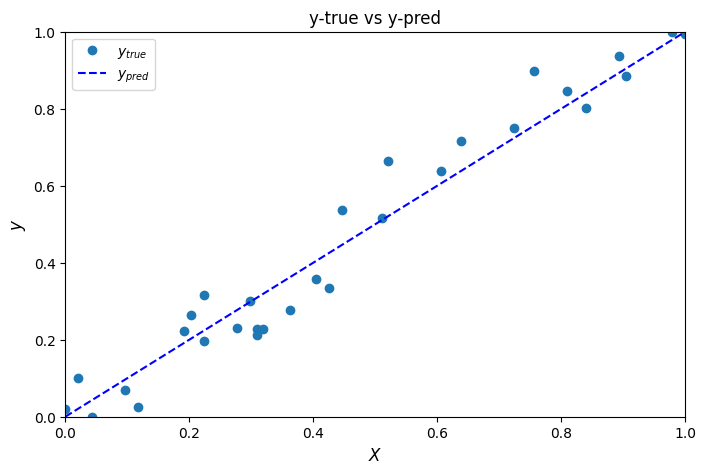

In [32]:
# Plotting our data
def plot_data_and_prediction(data, f, w):
    plt.figure(figsize=(8, 5))

    # Plot the target vs input and the initial line
    plt.plot(data_s.YearsExperience, data_s.Salary, 'o', label='$y_{true}$')
    plt.plot([0, 1], [f(0, w), f(1, w)], 'b--', label='$y_{pred}$')

    # Set labels, title, axis, and legend
    plt.xlabel('$X$', fontsize=12)
    plt.ylabel('$y$', fontsize=12)
    plt.axis((0, 1, 0, 1))
    plt.title('y-true vs y-pred')
    plt.legend(loc=2)
    plt.show()

# Using the provided function to plot
plot_data_and_prediction(data_s, nn, w)

### **Stochastic Gradient Descent example 1**

---



In [33]:
# Defining the parameters
s1_x, s1_t = data_s['Salary'][0], data_s['YearsExperience'][0]
w = 5
learning_rate = 2

# 1. Forward Pass
s1_output = s1_x * w

# 2. FeedForward Evaluation
s1_loss_val = np.mean((s1_t - s1_output)**2)


# 3. Backward Pass / Gradient Calculation
s1_grad_value = np.mean(2 * s1_x * (s1_output - s1_t))
s1_dw = learning_rate * s1_grad_value

# 4. Back Propagation / Update Weights
s1_w = w - s1_dw

print(f"Sample 1: Gradient = {s1_grad_value:.4f}, Δw = {s1_dw:.4f}, w: {s1_w:.4f}, loss: {s1_loss_val:.4f}")

Sample 1: Gradient = 0.0036, Δw = 0.0073, w: 4.9927, loss: 0.0091


### **Stochastic Gradient Descent example 2**

In [34]:
s2_x, s2_t = data_s['Salary'][1], data_s['YearsExperience'][1]
w_2 = s1_w
learning_rate = 2

# 1. Forward Pass
s2_output = s2_x * w_2

# 2. FeedForward Evaluation
s2_loss_val = np.mean((s2_t - s2_output)**2)


# 3. Backward Pass / Gradient Calculation
s2_grad_value = np.mean(2 * s2_x * (s2_output - s2_t))
s2_dw = learning_rate * s2_grad_value

# 4. Back Propagation / Update Weights
s2_w = w - s2_dw

print(f"Sample 2: Gradient = {s2_grad_value:.4f}, Δw = {s2_dw:.4f}, w: {s2_w:.4f}, loss: {s2_loss_val:.4f}")

Sample 2: Gradient = 0.0958, Δw = 0.1916, w: 4.8084, loss: 0.2289


## Using Hamids pipeline

In [35]:
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 5

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(data_s['Salary'])):
        x_i, t_i = data_s['Salary'][i], data_s['YearsExperience'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradient
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['Salary'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")

Epoch 1, Sample 1: Gradient = 0.0036, Δw = 0.0073, w: 4.9927, loss: 0.0091
Epoch 1, Sample 2: Gradient = 0.0958, Δw = 0.1916, w: 4.8012, loss: 0.2289
Epoch 1, Sample 3: Gradient = 0.0000, Δw = 0.0000, w: 4.8012, loss: 0.0018
Epoch 1, Sample 4: Gradient = 0.0319, Δw = 0.0637, w: 4.7374, loss: 0.0542
Epoch 1, Sample 5: Gradient = 0.0002, Δw = 0.0004, w: 4.7370, loss: 0.0000
Epoch 1, Sample 6: Gradient = 0.3872, Δw = 0.7744, w: 3.9627, loss: 0.7511
Epoch 1, Sample 7: Gradient = 0.4487, Δw = 0.8974, w: 3.0653, loss: 0.7178
Epoch 1, Sample 8: Gradient = 0.1507, Δw = 0.3015, w: 2.7638, loss: 0.1457
Epoch 1, Sample 9: Gradient = 0.4094, Δw = 0.8188, w: 1.9450, loss: 0.4208
Epoch 1, Sample 10: Gradient = 0.0783, Δw = 0.1567, w: 1.7883, loss: 0.0291
Epoch 1, Sample 11: Gradient = 0.1448, Δw = 0.2896, w: 1.4987, loss: 0.0578
Epoch 1, Sample 12: Gradient = 0.0048, Δw = 0.0096, w: 1.4891, loss: 0.0001
Epoch 1, Sample 13: Gradient = 0.0135, Δw = 0.0269, w: 1.4622, loss: 0.0009
Epoch 1, Sample 14: G

## **Attention Mechanism Exercise**

We choose to work with the sentences:
*  He swung the bat, aiming for a homerun
*  A bat flew quietly in the moonlit night

In [36]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_1 = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Encode text
text_1 = "He swung the bat aiming for the ball"
inputs_1 = tokenizer(text_1, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model_1(**inputs_1)

# Extract attentions
attentions_1 = outputs.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention_1 = attentions_1[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens_1 = tokenizer.tokenize(tokenizer.decode(inputs_1['input_ids'][0]))

In [37]:
# Encode text
text_2 = "A bat flew quietly in the dark night"
inputs_2 = tokenizer(text_2, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model_1(**inputs_2)

# Extract attentions
attentions_2 = outputs.attentions  # Tuple of 12 (one per layer) matrices of shape (batch_size, num_heads, sequence_length, sequence_length)

# For simplicity, we'll use the attention weights from the first layer and the first head.
attention_2 = attentions_2[0][0, 0, :, :].detach().numpy()

# Tokenize the text to match tokens with attention weights
tokens_2 = tokenizer.tokenize(tokenizer.decode(inputs_2['input_ids'][0]))

<ipython-input-38-fed374817c3a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([''] + tokens_1, rotation=90)
<ipython-input-38-fed374817c3a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([''] + tokens_1)
<ipython-input-38-fed374817c3a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([''] + tokens_2, rotation=90)
<ipython-input-38-fed374817c3a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([''] + tokens_2)


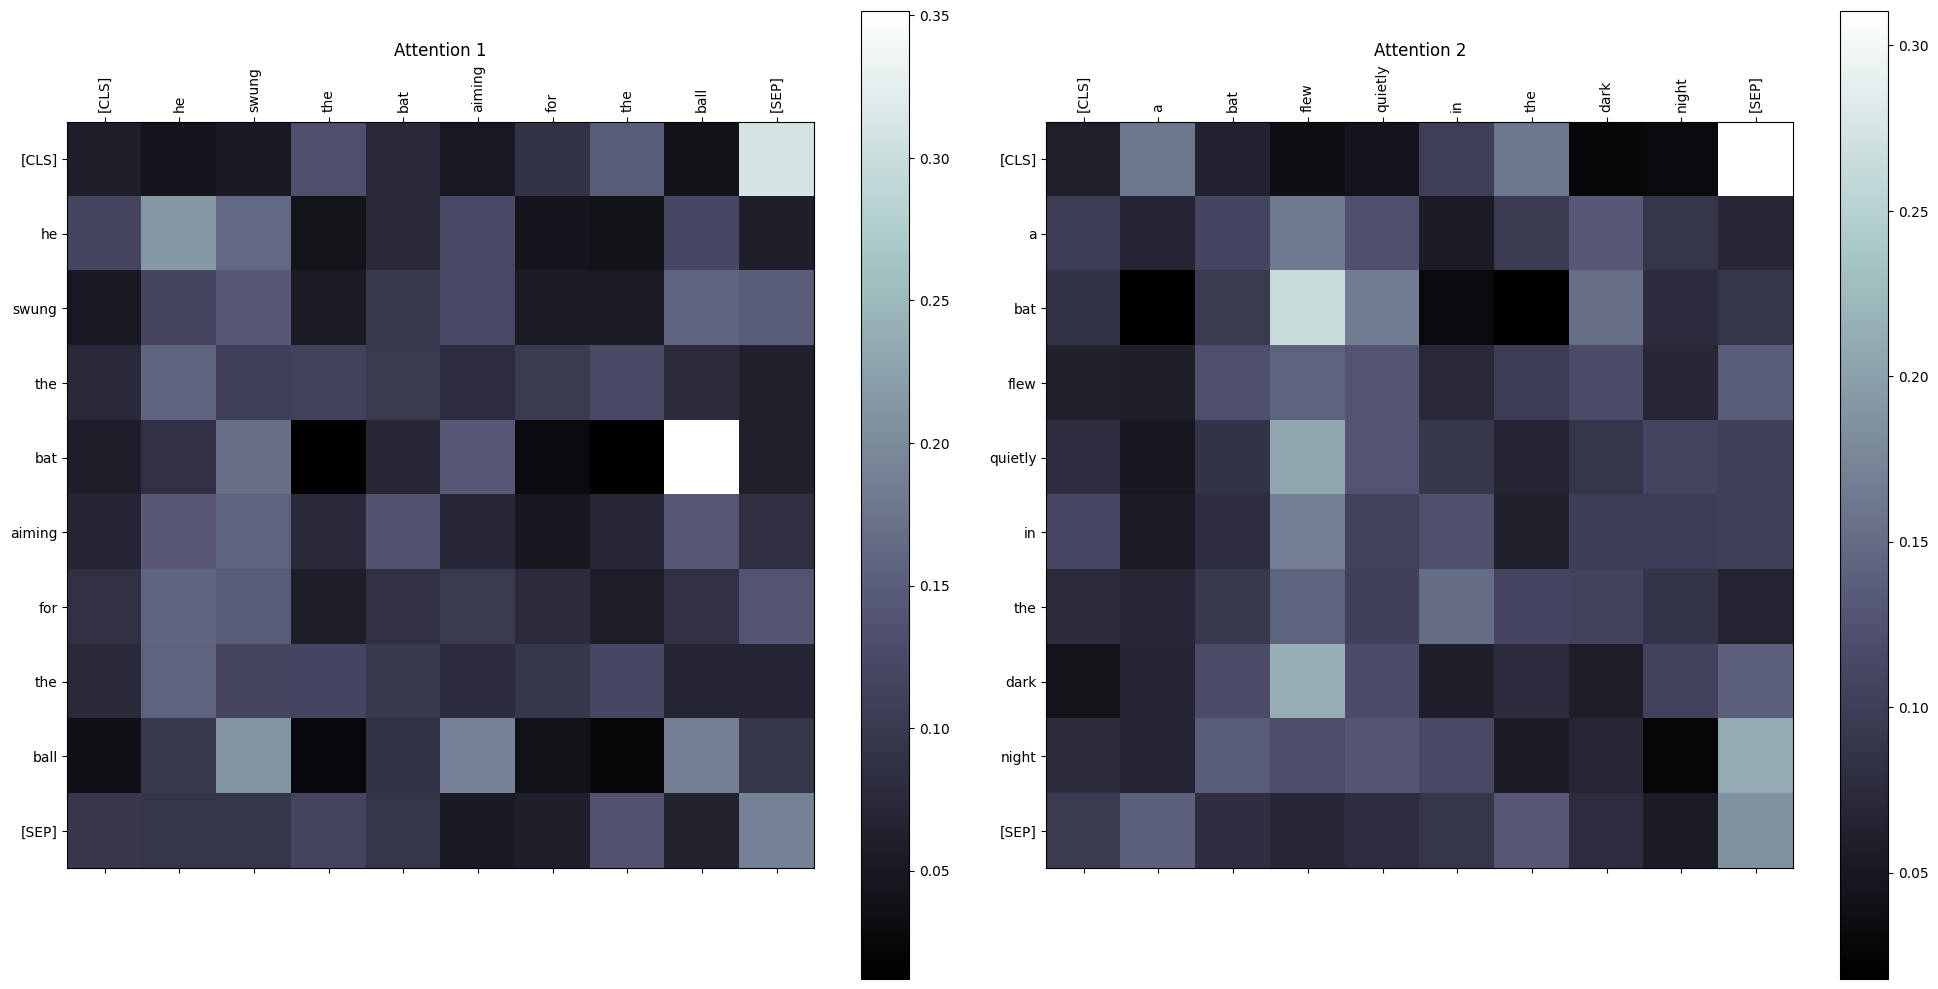

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Create a figure with 1 row and 2 columns

# Visualize attention_1
cax1 = axs[0].matshow(attention_1, cmap='bone')
fig.colorbar(cax1, ax=axs[0])
axs[0].set_xticklabels([''] + tokens_1, rotation=90)
axs[0].set_yticklabels([''] + tokens_1)
axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].set_title('Attention 1')

# Visualize attention_2
cax2 = axs[1].matshow(attention_2, cmap='bone')
fig.colorbar(cax2, ax=axs[1])
axs[1].set_xticklabels([''] + tokens_2, rotation=90)
axs[1].set_yticklabels([''] + tokens_2)
axs[1].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(1))
axs[1].set_title('Attention 2')

plt.tight_layout()
plt.show()